In [80]:
import numpy as np
from sparse_shift import KCD
import matplotlib.pyplot as plt


In [81]:
def simulate_data(n, shift=0, scale=1, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.normal(0, 1, (n, 1))
    X12 = X11 + np.random.normal(0, 1, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.normal(0, 1, (n, 1))
    X22 = X21 + np.random.normal(shift, scale, (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

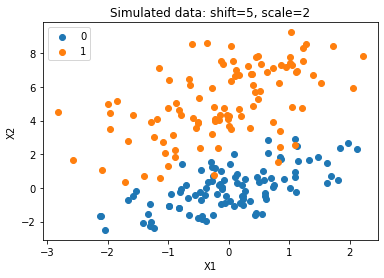

In [8]:
shift = 5
scale = 2
X, y = simulate_data(100, shift=shift, scale=scale)
f, ax = plt.subplots(1, 1)
for y_val in np.unique(y):
    idx = np.where(y == y_val)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=y_val)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Simulated data: shift={shift}, scale={scale}')
ax.legend()
plt.show()

In [82]:
ns = [10, 25, 50, 100, 200]
n_reps = 100
n_jobs = 10
n_power_reps = 20
shifts = [0, 0.1, 0.2, 0.5, 1, 2, 5, 10]
scales = [0.1, 0.2, 0.5, 1, 2, 5, 10]

In [83]:
shift_pvals = []
shift_stats = []

for shift in shifts:
    print(shift, end='\n')
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_data(n=n, shift=shift, random_state=prep)
            stat, pvalue = KCD(n_jobs=n_jobs).test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            shift_pvals.append(pvalue)
            shift_stats.append(stat)
    print('\n')

scale_pvals = []
scale_stats = []
for scale in scales:
    print(scale, end='\n')
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_data(n=n, scale=scale, random_state=prep)
            stat, pvalue = KCD(n_jobs=n_jobs).test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            scale_pvals.append(pvalue)
            scale_stats.append(stat)
    print('\n')

0
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

10
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.1
012345678910111213141516171819

0.2
012345678910111213141516171819

0.5
012345678910111213141516171819

1
012345678910111213141516171819

2
012345678910111213141516171819

5
012345678910111213141516171819

10
012345678910111213141516171819



In [12]:
np.save(
    '../data/03_shift_pvals.npy',
    np.reshape(shift_pvals, (len(shifts), n_power_reps, len(ns))))
np.save(
    '../data/03_shift_stats.npy',
    np.reshape(shift_stats, (len(shifts), n_power_reps, len(ns))))
np.save(
    '../data/03_scale_pvals.npy',
    np.reshape(scale_pvals, (len(scales), n_power_reps, len(ns))))
np.save(
    '../data/03_scale_stats.npy',
    np.reshape(scale_stats, (len(scales), n_power_reps, len(ns))))

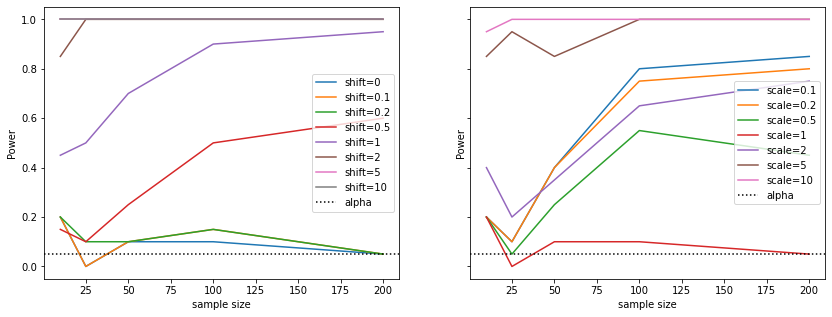

In [84]:
alpha = 0.05
power_plot = np.reshape(shift_pvals, (len(shifts), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax = axes[0]
for i, shift in enumerate(shifts):
    ax.plot(ns, power_plot[i], label=f'shift={shift}')
ax.axhline(alpha, c='black', ls=':', label='alpha')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Power')

power_plot = np.reshape(scale_pvals, (len(scales), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
ax = axes[1]
for i, scale in enumerate(scales):
    ax.plot(ns, power_plot[i], label=f'scale={scale}')
ax.axhline(alpha, c='black', ls=':', label='alpha')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Power')

plt.show()

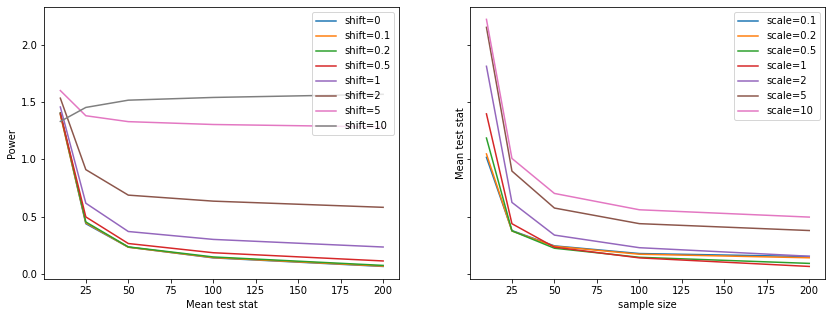

In [20]:
alpha = 0.05
power_plot = np.reshape(shift_stats, (len(shifts), n_power_reps, len(ns)))
power_plot = power_plot.mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

ax = axes[0]
for i, shift in enumerate(shifts):
    ax.plot(ns, power_plot[i], label=f'shift={shift}')
ax.legend()
ax.set_xlabel('Mean test stat')
ax.set_ylabel('Power')

power_plot = np.reshape(scale_stats, (len(scales), n_power_reps, len(ns)))
power_plot = power_plot.mean(axis=1)
ax = axes[1]
for i, scale in enumerate(scales):
    ax.plot(ns, power_plot[i], label=f'scale={scale}')
ax.legend()
ax.set_xlabel('sample size')
ax.set_ylabel('Mean test stat')

plt.show()

## Beta distribution

In [67]:
from scipy.stats import beta

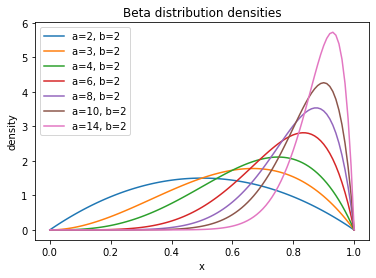

In [150]:
a_list = [2, 3, 4, 6, 8, 10, 14]
b = 2
f, ax = plt.subplots(1, 1)
for a in a_list:
    # b = a/8
    plt.plot(x, beta(a, b).pdf(x), label=f'a={a}, b={b}')
plt.xlabel('x')
ax.set_ylabel('density')
plt.title('Beta distribution densities')
ax.legend()
plt.show()

In [127]:
def simulate_betas(n, a=2, b=2, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = beta(2, 2).pdf(X11) + np.random.normal(0, 1, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = beta(a, b).pdf(X21) + np.random.normal(0, 1, (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

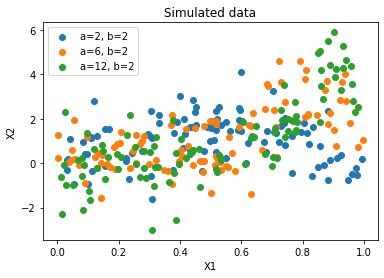

In [135]:
b = 2
a_list = [2, 6, 12]
f, ax = plt.subplots(1, 1)
for a in a_list:
    X, y = simulate_betas(100, a=a, b=b)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'a={a}, b={b}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.show()

In [132]:
ns = [10, 25, 50, 100, 200]
n_reps = 100
n_jobs = 10
n_power_reps = 20
b = 2
a_list = [2, 4, 6, 8, 10, 12]

beta_pvals = []
beta_stats = []

for a in a_list:
    print(a)
    for prep in range(n_power_reps):
        print(prep, end=' ')
        for n in ns:
            X, y = simulate_betas(n=n, a=a, b=b, random_state=prep)
            kcd = KCD(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            beta_pvals.append(pvalue)
            beta_stats.append(stat)
    print('\n')

2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

6
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

8
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

12
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 



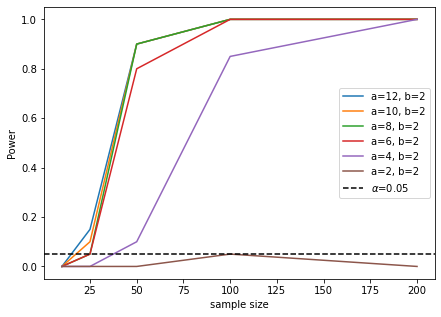

In [148]:
a_list = [2, 4, 6, 8, 10, 12]
alpha = 0.05
power_plot = np.reshape(beta_pvals, (len(a_list), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, a in enumerate(a_list[::-1]):
    ax.plot(ns, power_plot[::-1][i], label=f'a={a}, b={b}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Power')
ax.legend()
plt.show()

## Power distribution

In [187]:
def simulate_power(n, power=1, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = X11 + np.random.normal(0, 0.2, (n, 1))
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = X21**power + np.random.normal(0, 0.2 (n, 1))
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

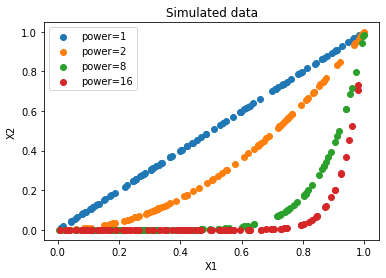

In [188]:
powers = [1, 2, 8, 16]
f, ax = plt.subplots(1, 1)
for power in powers:
    X, y = simulate_power(100, power=power)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'power={power}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.show()

In [185]:
ns = [10, 25, 50, 100, 200]
n_reps = 100
n_jobs = 10
n_power_reps = 20
powers = [0.25, 0.5, 1, 2, 4, 8]

power_pvals = []
power_stats = []

for power in powers:
    print(power)
    for prep in range(n_power_reps):
        print(prep, end=' ')
        for n in ns:
            X, y = simulate_power(n=n, power=power, random_state=prep)
            kcd = KCD(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            power_pvals.append(pvalue)
            power_stats.append(stat)
    print('\n')

0.25
0 1 2 3 

/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

KeyboardInterrupt: 

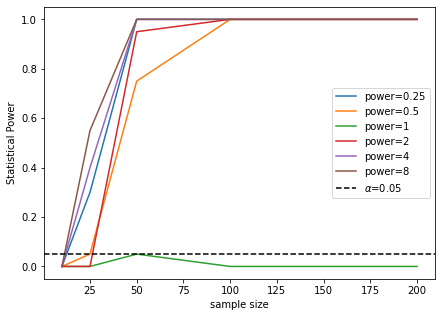

In [183]:
alpha = 0.05
power_plot = np.reshape(power_pvals, (len(powers), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, power in enumerate(powers):
    ax.plot(ns, power_plot[i], label=f'power={power}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Statistical Power')
ax.legend()
plt.show()

## Sharpness

In [75]:
def peaking(X, alpha):
    idx0 = np.where(X < 0.5)[0]
    idx1 = np.where(X >= 0.5)[0]
    X2 = np.zeros((X.shape[0], 1))
    X2[idx1] = 0
    X2[idx0] = X[idx0]**(-alpha) - 0.5**(-alpha)
    X2 += np.random.normal(0, 1, (X.shape[0], 1))
    
    return X2

def simulate_peaking(n, alpha, random_state=None):
    np.random.seed(random_state)
    X11 = np.random.uniform(0, 1, (n, 1))
    X12 = peaking(X11, 0)
    y1 = np.ones((n, 1)) * 0
    
    X21 = np.random.uniform(0, 1, (n, 1))
    X22 = peaking(X21, alpha)
    y2 = np.ones((n, 1))
    
    return np.block([
        [X11, X12],
        [X21, X22]]
    ), np.vstack((y1, y2)).astype(int).flatten()

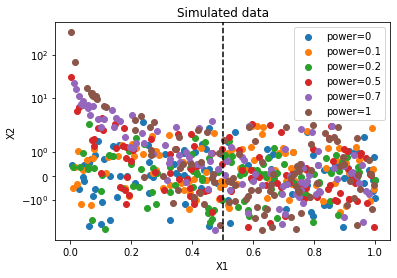

In [76]:
powers = [0, 0.1, 0.2, 0.5, 0.7, 1]
f, ax = plt.subplots(1, 1)
for power in powers:
    X, y = simulate_peaking(100, alpha=power)
    idx = np.where(y == 1)[0]
    plt.scatter(X[idx, 0], X[idx, 1], label=f'power={power}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated data')
ax.legend()
plt.yscale('symlog')
plt.axvline(0.5, ls='--', c='black')
plt.show()

In [65]:
ns = [10, 25, 50, 100, 200]
n_reps = 100
n_jobs = 10
n_power_reps = 20
powers = [0, 0.1, 0.2, 0.5, 0.7, 1]

power_pvals = []
power_stats = []

for power in powers:
    print(power)
    for prep in range(n_power_reps):
        print(prep, end=', ')
        for n in ns:
            X, y = simulate_peaking(n=n, alpha=power, random_state=prep)
            kcd = KCD(n_jobs=n_jobs)
            stat, pvalue = kcd.test(
                    X[:, :1], X[:, 1:], y,
                    reps=n_reps)
            power_pvals.append(pvalue)
            power_stats.append(stat)
    print('\n')

0
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.2
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.5
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

0.7
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

1
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,



In [77]:
np.save(
    '../data/03_sharpness_pvals.npy',
    np.reshape(power_pvals, (len(powers), n_power_reps, len(ns))))
np.save(
    '../data/03_sharpness_stats.npy',
    np.reshape(power_stats, (len(powers), n_power_reps, len(ns))))

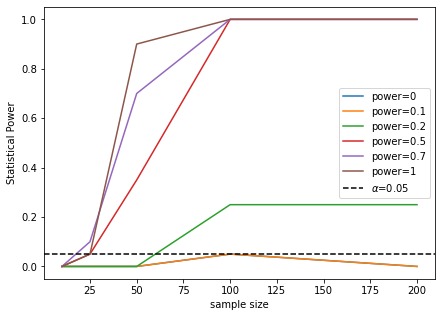

In [66]:
alpha = 0.05
power_plot = np.reshape(power_pvals, (len(powers), n_power_reps, len(ns)))
power_plot = (power_plot <= alpha).mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

ax = axes
for i, power in enumerate(powers):
    ax.plot(ns, power_plot[i], label=f'power={power}')
ax.axhline(alpha, ls='--', c='black', label=r'$\alpha$' + f'={alpha}')
ax.set_xlabel('sample size')
ax.set_ylabel('Statistical Power')
ax.legend()
plt.show()